In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

2023-08-05 14:35:31.072801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 14:35:32.113315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
            
            
    except RuntimeError as e:
        print(e)
            
            
            
            

2023-08-05 14:35:33.271594: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-08-05 14:35:33.271680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: Aspire-E5-575G
2023-08-05 14:35:33.271699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: Aspire-E5-575G
2023-08-05 14:35:33.271851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2023-08-05 14:35:33.271901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2023-08-05 14:35:33.271916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


In [3]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce 940MX (UUID: GPU-ffb5177f-d8ce-71bb-2ac1-8bdd43322698)


# DATA PREPROCESSING

In [4]:
df_train = pd.read_csv('new data/train.txt' , names=['content', 'sentiment'], sep=';')

In [5]:
df_train

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
df_test = pd.read_csv('new data/test.txt' , names=['content', 'sentiment'], sep=';')
df_test

,content,sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [7]:
df_val = pd.read_csv('new data/val.txt' , names=['content', 'sentiment'], sep=';')
df_val

,content,sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


## Assesment of the data

### Training

In [8]:
df_train.sentiment.value_counts()

sentiment
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [9]:
df_train.sentiment.value_counts() / df_train.shape[0] *100

sentiment
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64

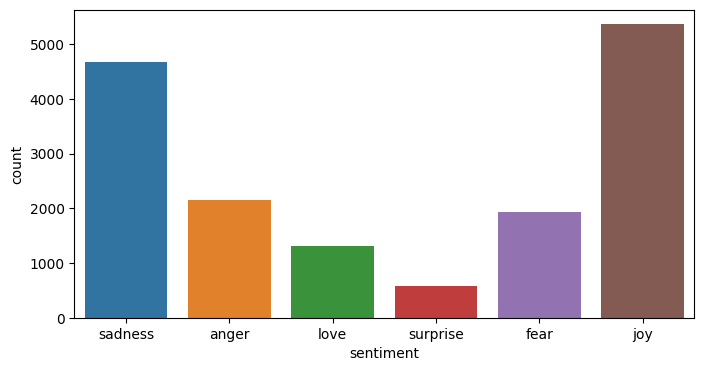

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df_train);

In [11]:
df_train.isnull().sum()

content      0
sentiment    0
dtype: int64

In [12]:
df_train.duplicated().sum()

1

In [13]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [14]:
df_train[df_train['content'].duplicated() == True]

,content,sentiment
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [15]:
index = df_train[df_train['content'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [16]:
df_train.duplicated().sum()

0

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

### Test Set

In [19]:
df_test.sentiment.value_counts()

sentiment
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

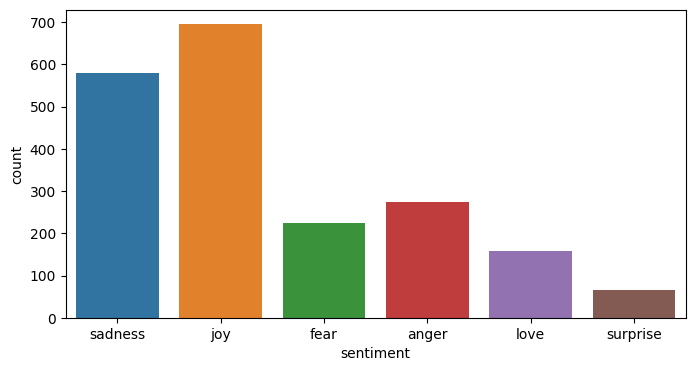

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df_test);

In [21]:
df_test.isnull().sum()

content      0
sentiment    0
dtype: int64

In [22]:
df_test.duplicated().sum()

0

In [23]:
temp =df_test.copy()
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

### Validation set

In [24]:
df_val.sentiment.value_counts()

sentiment
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

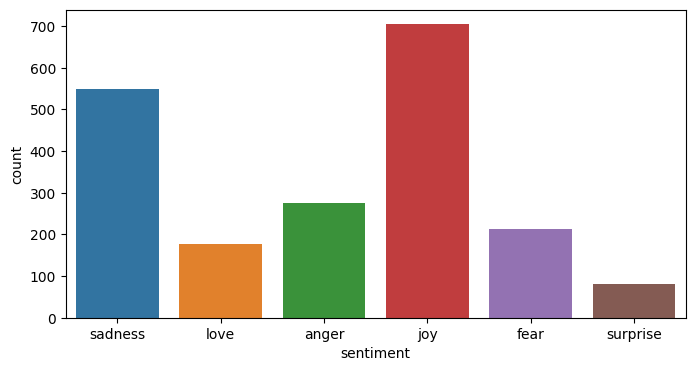

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df_val);

In [26]:
df_val.isnull().sum()

content      0
sentiment    0
dtype: int64

In [27]:
df_val.duplicated().sum()

0

In [28]:
temp =df_val.copy()
temp['stop_words'] = temp['sentiment'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
0    2000
Name: count, dtype: int64

In [29]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    
    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )
    
    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
        
    # Return the filtered DataFrame
    return diff_df

In [30]:
dataframe_difference(df_train, df_test, which='both')

,content,sentiment,_merge


In [31]:
dataframe_difference(df_train, df_val, which='both')

,content,sentiment,_merge


In [32]:
dataframe_difference(df_test, df_val, which='both')

,content,sentiment,_merge


### Cleaning

In [33]:
nltk.download('wordnet')
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

[nltk_data] Downloading package wordnet to /home/jay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

In [35]:
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [36]:
def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

In [37]:
import re
def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

In [38]:
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [39]:
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

In [40]:
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    return df

In [41]:
def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [42]:
normalized_sentence("Extremely busy weekend. So much work to do. C")

'extremely busy weekend much work do c'

In [43]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

In [44]:
df_train

,content,sentiment
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15964,brief time beanbag said anna feel like beaten,sadness
15965,turning feel pathetic still waiting table subb...,sadness
15966,feel strong good overall,joy
15967,feel like rude comment im glad,anger


# MODEL

* 0. Baseline ML model with TF-IDF
* 1. ANN 
    * 1.1  Basic Multiclass Classification
    * 1.2  

## 0. Baseline ML model with TF-IDF

In [45]:
x_train = df_train['content'].values
y_train = df_train['sentiment'].values

x_test = df_test['content'].values
y_test = df_test['sentiment'].values

x_val = df_val['content'].values
y_val = df_val['sentiment'].values

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [47]:
y_train

array([4, 4, 0, ..., 2, 0, 4])

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

def train_model(model, data, targets):
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

In [49]:
from sklearn.ensemble import RandomForestClassifier
model_0 = train_model(RandomForestClassifier(random_state = 0), x_train, y_train)

In [50]:
model_0.predict(['i want to kill my self'])

array([0])

In [51]:
y_pred=model_0.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
model_0_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', model_0_accuracy,'\n')

Accuracy:  0.8895 



In [53]:
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

In [54]:
from sklearn.metrics import f1_score
f1_Score = get_F1(model_0,x_test,y_test)
pd.DataFrame(f1_Score, index=df_train.sentiment.unique(), columns=['F1 score'])

,F1 score
sadness,0.903811
anger,0.868421
love,0.908199
surprise,0.738983
fear,0.933798
joy,0.634146


In [55]:
from sklearn.naive_bayes import MultinomialNB

model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

In [56]:
model_0.fit(x_train,y_train)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [57]:
model_0.score(x_train,y_train)

0.7538981777193312

## 1. ANN models

### Tokenizing 

In [58]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
y_train = to_categorical(y_train)  #class vector to binary class matrix..basically one-hot-encoding
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [60]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

### Vectorization

In [61]:
sent_lens = [len(sentence.split()) for sentence in x_train]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

9.355000313106643

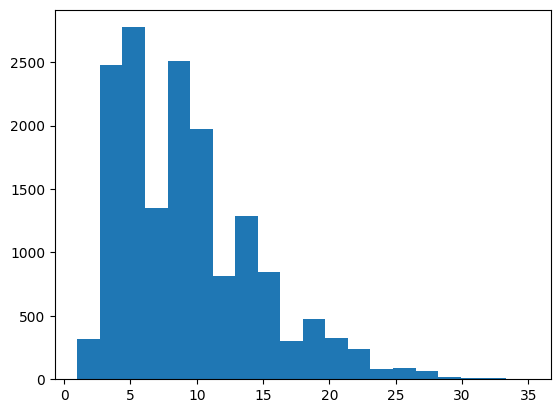

In [62]:
plt.hist(sent_lens, bins=20);

In [63]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

20

In [64]:
max(sent_lens)

35

In [65]:
max_tokens = 15000

In [66]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=output_seq_len) # desired output length of vectorized sequences

In [67]:
x_token = text_vectorizer.adapt(x_train)

In [68]:
target_sentence = 'i feel on the verge of tears from weariness i'
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
i feel on the verge of tears from weariness i

Length of text: 10

Vectorized text: [[   1    2    1    1 3234    1    1    1 4824    1    0    0    0    0
     0    0    0    0    0    0]]


### Embedding

In [69]:
text_vocab = text_vectorizer.get_vocabulary()
len(text_vocab)

13480

In [70]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
token_embed = layers.Embedding(input_dim=len(text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically differnt numbers of parameters to train
                               mask_zero=True, # use masking to handle variable sequence lengths (save space),
                               name="token_embedding")

In [72]:
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 i feel on the verge of tears from weariness i

Sentence after vectorization (before embedding):
 [[   1    2    1    1 3234    1    1    1 4824    1    0    0    0    0
     0    0    0    0    0    0]]

Sentence after embedding:
 [[[ 0.04753634 -0.00237759  0.04646682 ...  0.02479139  0.00411962
   -0.03185236]
  [-0.02444513  0.0041246  -0.00353848 ... -0.01329453  0.02650751
    0.03537877]
  [ 0.04753634 -0.00237759  0.04646682 ...  0.02479139  0.00411962
   -0.03185236]
  ...
  [-0.04830116 -0.04538882 -0.0325888  ...  0.02532251 -0.0336681
    0.04543782]
  [-0.04830116 -0.04538882 -0.0325888  ...  0.02532251 -0.0336681
    0.04543782]
  [-0.04830116 -0.04538882 -0.0325888  ...  0.02532251 -0.0336681
    0.04543782]]]

Embedded sentence shape: (1, 20, 128)


### Model 1.1

In [64]:
#dataset into tensor
train_dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val ))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(6,), dtype=tf.float32, name=None))>

In [65]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [66]:
# Create 1D conv model to process sequences
num_classes = 6
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector from conv layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 20)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 20, 128)           1725440   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 20, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [72]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.05*len(train_dataset)),
                              epochs=5,
                              validation_data=valid_dataset,
                              validation_steps=int(0.05 * len(valid_dataset)))

Epoch 1/5
25/25 [==============================] - 1s 30ms/step - loss: 0.2751 - accuracy: 0.9200 - val_loss: 0.4556 - val_accuracy: 0.8750
Epoch 2/5
25/25 [==============================] - 1s 28ms/step - loss: 0.1905 - accuracy: 0.9613 - val_loss: 0.4148 - val_accuracy: 0.8958
Epoch 3/5
25/25 [==============================] - 1s 27ms/step - loss: 0.2090 - accuracy: 0.9362 - val_loss: 0.4041 - val_accuracy: 0.8958
Epoch 4/5
25/25 [==============================] - 1s 27ms/step - loss: 0.1397 - accuracy: 0.9762 - val_loss: 0.3880 - val_accuracy: 0.8958
Epoch 5/5
25/25 [==============================] - 1s 28ms/step - loss: 0.1365 - accuracy: 0.9725 - val_loss: 0.3823 - val_accuracy: 0.8854


In [73]:
model_1.evaluate(valid_dataset)

63/63 [==============================] - 0s 4ms/step - loss: 0.5493 - accuracy: 0.8250


[0.5493316650390625, 0.824999988079071]

In [74]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

63/63 [==============================] - 0s 3ms/step


(array([[4.2552925e-03, 1.2265876e-03, 2.1810026e-03, 3.1019500e-04,
         9.9170482e-01, 3.2211095e-04],
        [6.7740469e-04, 3.0125153e-05, 5.9243821e-04, 2.9006160e-05,
         9.9863666e-01, 3.4436303e-05],
        [1.3784167e-03, 1.2074098e-02, 6.0612178e-01, 3.4951469e-01,
         3.8562401e-03, 2.7054697e-02],
        ...,
        [8.5384334e-03, 7.6641263e-03, 9.2788976e-01, 2.7810860e-02,
         1.6927313e-02, 1.1169391e-02],
        [1.3079504e-04, 5.0767104e-04, 9.5904762e-01, 3.7292376e-02,
         5.2418053e-04, 2.4974032e-03],
        [1.9356479e-04, 1.6917044e-04, 9.9282545e-01, 5.1453169e-03,
         1.0562572e-03, 6.1009568e-04]], dtype=float32),
 (2000, 6))

In [75]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([4, 4, 2, ..., 2, 2, 2])>